## Introduction

As in the current culture of NewYork/Manhattan cities there are plenty of food places giving mouth watering tasty food items, but identifying best venue which gives unforgettable experience along with nice ambiance and delicious food is a challenge for any visitor. A business man and passionate cook want to start a India food place(Restaurant) in Manhattan, it will be tough time to find out correct neighborhood in between so many other already established food places with various cuisines symbolizing number countries.
There should be a way to identify best venue to start Indian restaurant and provide authentic food with family atmosphere along with a touch Indian culture.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         238 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0        conda-forge
    geopy:         1.20.0-py_0      conda-forge

The following pac

## 2. <a id="item2"></a> Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Using this dataset from: https://geo.nyu.edu/catalog/nyu_2451_34572

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

###  Load data of all neighborhoods 


In [4]:
neighborhoods_data = newyork_data['features']

### Transform the data in to a data frame

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


### loop through neighborhoods_data to fill our new dataframe

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [16]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.


In [38]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()
manhattan_data.shape

(40, 4)

### Create a Map of Manhattan using Latitude and Longitude

In [10]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Now lets explore neighborhoods of Manhattan using FourSquare API

In [11]:
CLIENT_ID = 'CVXYHIN3N4SCF0CEJ0N1IRTWN4BI2QIGRSB51HSTMXIVVHHV' # your Foursquare ID
CLIENT_SECRET = 'QVPHXB1TKIRKEZYY3VLCK10MG0NWVUSKWQN0FI0EHZE2KALO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CVXYHIN3N4SCF0CEJ0N1IRTWN4BI2QIGRSB51HSTMXIVVHHV
CLIENT_SECRET:QVPHXB1TKIRKEZYY3VLCK10MG0NWVUSKWQN0FI0EHZE2KALO


In [12]:
manhattan_data.loc[1, 'Neighborhood']

'Chinatown'

#### Find out 'Chinatown' longitude and latitude

In [13]:
neighborhood_latitude = manhattan_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[1, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chinatown are 40.71561842231432, -73.99427936255978.


#### Lets get all top 100 venues of Chinatown around 500 meters radius

In [14]:

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d9ea6fe49cf93002b3cdab2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Chinatown',
  'headerFullLocation': 'Chinatown, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 233,
  'suggestedBounds': {'ne': {'lat': 40.720118426814324,
    'lng': -73.98835342594391},
   'sw': {'lat': 40.71111841781432, 'lng': -74.00020529917565}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '578692f4498e1054905dbde7',
       'name': 'Hotel 50 Bowery NYC',
       'location': {'address': '50 Bowery',
        'crossStreet': 'btwn Bayard & Canal St',
        'lat': 40.7159364,
        'lng': -73.996

Based Foursquare lab, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '578692f4498e1054905dbde7',
   'name': 'Hotel 50 Bowery NYC',
   'location': {'address': '50 Bowery',
    'crossStreet': 'btwn Bayard & Canal St',
    'lat': 40.7159364,
    'lng': -73.9967894,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.7159364,
      'lng': -73.9967894}],
    'distance': 214,
    'postalCode': '10013',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['50 Bowery (btwn Bayard & Canal St)',
     'New York, NY 10013',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d1fa931735',
     'name': 'Hotel',
     'pluralName': 'Hotels',
     'shortName': 'Hotel',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'gro

In [18]:
#venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Hotel 50 Bowery NYC,Hotel,40.715936,-73.996789
1,Bar Belly,Cocktail Bar,40.715135,-73.991802
2,Kiki's,Greek Restaurant,40.714476,-73.992036
3,Spicy Village,Chinese Restaurant,40.717010,-73.993530
4,Scarr's Pizza,Pizza Place,40.715335,-73.991649
5,Grand Seoul,Korean Restaurant,40.717447,-73.994256
6,Michaeli Bakery,Bakery,40.714704,-73.991847
7,Cheeky Sandwiches,Sandwich Place,40.715707,-73.991508
8,The Fat Radish,English Restaurant,40.715323,-73.991950
9,Renew Day Spa,Spa,40.715559,-73.996747


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## 3. Explore Neighborhoods in Manhattan
#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [20]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe

In [21]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3329, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


Let's check how many venues were returned for each neighborhood

In [22]:
#g1=manhattan_venues.groupby('Neighborhood').count()
#g1.add_suffix('_Count').reset_index() convert to dataframe
Agdata=pd.DataFrame({'count' :manhattan_venues.groupby('Neighborhood').size()}).reset_index()
Agdata.describe()

,count
count,40.000000
mean,83.225000
std,26.420163
min,18.000000
25%,62.000000
50%,100.000000
75%,100.000000
max,100.000000


### Lets check the number of venues for each category in Midtown Neighborhood

In [23]:
ggCat=manhattan_venues[manhattan_venues['Neighborhood'] == 'Midtown' ]

ggCat .groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,2,2,2,2,2,2
Art Gallery,1,1,1,1,1,1
Bakery,3,3,3,3,3,3
Bar,1,1,1,1,1,1
Bookstore,3,3,3,3,3,3
Boutique,1,1,1,1,1,1
Boxing Gym,1,1,1,1,1,1
Brazilian Restaurant,1,1,1,1,1,1
Burger Joint,1,1,1,1,1,1


### Create visualization in bar chart for Midtown neighborhood

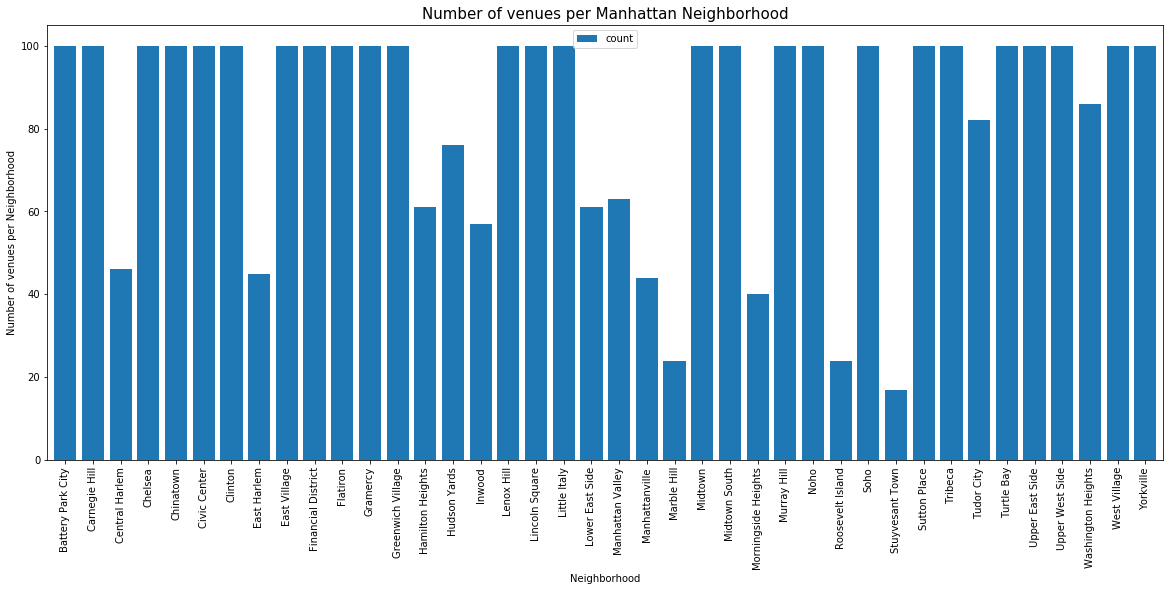

In [31]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
ax=Agdata.set_index('Neighborhood')
ax.plot(kind='bar', figsize=(20, 8), width=0.8)
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of venues % Neighborhood') # add y-label to the plot
plt.title('Number of venues per Manhattan Neighborhood', fontsize=15) # add title to the plot

plt.show()

#### Let's find out unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 335 uniques categories.


## 4. <a id="item4"></a> Now lets Analyze Each Neighborhood

In [25]:
# one hot encoding
Manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Manhattan_onehot.columns[-1]] + list(Manhattan_onehot.columns[:-1])
Manhattan_onehot = Manhattan_onehot[fixed_columns]

Manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Sto

 Let's do quick examine of this dataframe

In [38]:
Manhattan_onehot.shape

(3326, 339)

#### Get a mean frequency of each category by grouping neighborhood

In [26]:
Manhattan_grouped = Manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [27]:
Manhattan_grouped.shape

(40, 336)

#### Let's print each neighborhood along with the top 10 most common venues

In [28]:
num_top_venues = 10

for hood in Manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Manhattan_grouped[Manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0                Park  0.08
1         Coffee Shop  0.06
2               Hotel  0.05
3                 Gym  0.04
4       Memorial Site  0.04
5           Wine Shop  0.03
6       Boat or Ferry  0.03
7      Ice Cream Shop  0.02
8  Italian Restaurant  0.02
9       Shopping Mall  0.02


----Carnegie Hill----
                 venue  freq
0          Coffee Shop  0.06
1          Pizza Place  0.06
2                 Café  0.05
3          Yoga Studio  0.03
4                  Spa  0.03
5            Wine Shop  0.03
6  Japanese Restaurant  0.03
7            Bookstore  0.03
8       Cosmetics Shop  0.03
9               Bakery  0.03


----Central Harlem----
                 venue  freq
0   Seafood Restaurant  0.04
1  Fried Chicken Joint  0.04
2       Cosmetics Shop  0.04
3    French Restaurant  0.04
4                  Bar  0.04
5   African Restaurant  0.04
6   Chinese Restaurant  0.04
7  American Restaurant  0.04
8     Tapas Restaurant  0.02
9       

#### Let's put that into a *pandas* dataframe
This will be help full to do clustering by neighborhood

First create a function to sort venues, later call that function to create a dataframe

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Manhattan_grouped['Neighborhood']

for ind in np.arange(Manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Wine Shop,Boat or Ferry,Playground,Shopping Mall,Sandwich Place
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Bookstore,Spa,French Restaurant,Japanese Restaurant,Bakery,Gym
2,Central Harlem,Fried Chicken Joint,Cosmetics Shop,Bar,French Restaurant,Chinese Restaurant,Seafood Restaurant,African Restaurant,American Restaurant,Cycle Studio,Cafeteria
3,Chelsea,Coffee Shop,Ice Cream Shop,Bakery,Italian Restaurant,Theater,American Restaurant,Nightclub,Hotel,Seafood Restaurant,Men's Store
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Bakery,Vietnamese Restaurant,Spa,Bubble Tea Shop,Asian Restaurant,Mexican Restaurant
5,Civic Center,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Sandwich Place,French Restaurant,Yoga Studio,Cocktail Bar,Spa,Sporting Goods Shop,Bakery
6,Clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Spa,Wine Shop,Gym,Hotel,Food Court,Sandwich Place
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Restaurant,Coffee Shop,Cocktail Bar,Beer Bar,Convenience Store
8,East Village,Ice Cream Shop,Wine Bar,Bar,Mexican Restaurant,Chinese Restaurant,Cocktail Bar,Pizza Place,Vegetarian / Vegan Restaurant,Dessert Shop,Ramen Restaurant
9,Financial District,Coffee Shop,Gym,Hotel,Wine Shop,American Restaurant,Pizza Place,Café,Event Space,Mediterranean Restaurant,Food Truck


In [50]:
Manhattan_grouped.shape[0]

40

## 5. <a id="item5"></a> Cluster Neighborhoods

By running k-means to create 5 clusters per neighborhood

In [39]:
# set number of clusters
kclusters = 5

Manhattan_grouped_clustering = Manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [54]:
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [40]:
Manhattan_merged = manhattan_data

# add clustering labels
Manhattan_merged['Cluster Labels'] = kmeans.labels_

# merge brooklyn_grouped with toronto_data to add latitude/longitude for each neighborhood
Manhattan_merged = Manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Manhattan_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Salon / Barbershop,Bakery,Vietnamese Restaurant,Spa,Bubble Tea Shop,Asian Restaurant,Mexican Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Bakery,Mobile Phone Shop,Grocery Store,Sandwich Place,Supplement Shop,Chinese Restaurant,Coffee Shop,Spanish Restaurant,Park
3,Manhattan,Inwood,40.867684,-73.921210,2,Mexican Restaurant,Café,Lounge,Pizza Place,Deli / Bodega,Park,Chinese Restaurant,Frozen Yogurt Shop,Caribbean Restaurant,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Café,Mexican Restaurant,Pizza Place,Coffee Shop,Yoga Studio,Donut Shop,Caribbean Restaurant,School,Bakery,Chinese Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,2,Coffee Shop,Mexican Restaurant,Seafood Restaurant,Park,Chinese Restaurant,Italian Restaurant,Deli / Bodega,Music School,Sushi Restaurant,Other Nightlife
6,Manhattan,Central Harlem,40.815976,-73.943211,2,Fried Chicken Joint,Cosmetics Shop,Bar,French Restaurant,Chinese Restaurant,Seafood Restaurant,African Restaurant,American Restaurant,Cycle Studio,Cafeteria
7,Manhattan,East Harlem,40.792249,-73.944182,0,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Restaurant,Coffee Shop,Cocktail Bar,Beer Bar,Convenience Store
8,Manhattan,Upper East Side,40.775639,-73.960508,1,Italian Restaurant,Exhibit,Bakery,Art Gallery,Coffee Shop,Hotel,Gym / Fitness Center,French Restaurant,Juice Bar,Gourmet Shop
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Pizza Place,Bar,Sushi Restaurant,Deli / Bodega,Ice Cream Shop,Wine Shop,Diner


Let's visualize this cluster in a map using Folium

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Manhattan_merged['Latitude'], Manhattan_merged['Longitude'], Manhattan_merged['Neighborhood'], Manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. <a id="item6"></a> Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

#### Cluster 1

In [66]:
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 0, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Mobile Phone Shop,Sandwich Place,Grocery Store,Cosmetics Shop,Coffee Shop,New American Restaurant,Latin American Restaurant,Park
4,Hamilton Heights,Mexican Restaurant,Café,Pizza Place,Deli / Bodega,Coffee Shop,Yoga Studio,Liquor Store,Indian Restaurant,Park,Sushi Restaurant
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,Juice Bar,French Restaurant,Gym / Fitness Center,Hotel,Spa
11,Roosevelt Island,Park,Sandwich Place,Coffee Shop,Liquor Store,Café,Outdoors & Recreation,Metro Station,Greek Restaurant,School,Gym


#### Cluster 2

In [67]:
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 1, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Park,Cocktail Bar,Jazz Club,Wine Bar,American Restaurant,Bakery,Ice Cream Shop


#### Cluster 3

In [68]:
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 2, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Latin American Restaurant,Thai Restaurant,Cocktail Bar,Grocery Store,Donut Shop,Coffee Shop,French Restaurant
13,Lincoln Square,Theater,Gym / Fitness Center,Café,Plaza,Concert Hall,Italian Restaurant,Park,Performing Arts Venue,Indie Movie Theater,French Restaurant
15,Midtown,Hotel,Theater,Cocktail Bar,Coffee Shop,Clothing Store,Steakhouse,Japanese Restaurant,Bakery,Bookstore,Café
19,East Village,Bar,Ice Cream Shop,Wine Bar,Mexican Restaurant,Pizza Place,Chinese Restaurant,Ramen Restaurant,Vegetarian / Vegan Restaurant,Cocktail Bar,Coffee Shop
20,Lower East Side,Pizza Place,Coffee Shop,Art Gallery,Café,Japanese Restaurant,Park,Sandwich Place,Bakery,Ramen Restaurant,Chinese Restaurant
21,Tribeca,Italian Restaurant,American Restaurant,Park,Café,Boutique,Spa,Wine Shop,Greek Restaurant,Gym,Coffee Shop
22,Little Italy,Bakery,Café,Sandwich Place,Clothing Store,Salon / Barbershop,Mediterranean Restaurant,Thai Restaurant,Hotel,Ice Cream Shop,Yoga Studio
25,Manhattan Valley,Coffee Shop,Pizza Place,Indian Restaurant,Mexican Restaurant,Thai Restaurant,Spa,French Restaurant,Deli / Bodega,Yoga Studio,Bar
28,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Italian Restaurant,Wine Shop,Food Court,Shopping Mall,Sandwich Place
33,Midtown South,Korean Restaurant,Hotel Bar,Hotel,Japanese Restaurant,Cosmetics Shop,American Restaurant,Coffee Shop,Dessert Shop,Gym / Fitness Center,Yoga Studio


#### Cluster 4

In [70]:
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 3, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Yoga Studio,Pizza Place,Supplement Shop,Steakhouse,Seafood Restaurant,Clothing Store,Deli / Bodega,Department Store
1,Chinatown,Chinese Restaurant,Cocktail Bar,Vietnamese Restaurant,American Restaurant,Bakery,Spa,Salon / Barbershop,Bubble Tea Shop,Boutique,Optical Shop
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Bakery,Deli / Bodega,Pharmacy,Park,Chinese Restaurant,Spanish Restaurant
5,Manhattanville,Coffee Shop,Italian Restaurant,Mexican Restaurant,Park,Fried Chicken Joint,Seafood Restaurant,Café,Lounge,Bike Trail,Sushi Restaurant
6,Central Harlem,Chinese Restaurant,African Restaurant,Gym / Fitness Center,French Restaurant,Seafood Restaurant,Public Art,American Restaurant,Bar,Caribbean Restaurant,Southern / Soul Food Restaurant
9,Yorkville,Italian Restaurant,Gym,Bar,Coffee Shop,Pizza Place,Deli / Bodega,Sushi Restaurant,Wine Shop,Mexican Restaurant,Diner
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Burger Joint,Café,Gym,Gym / Fitness Center,Sporting Goods Shop,Cosmetics Shop
12,Upper West Side,Italian Restaurant,Wine Bar,Coffee Shop,Indian Restaurant,Bakery,Bar,Vegetarian / Vegan Restaurant,Thai Restaurant,Pub,Bookstore
14,Clinton,Theater,Gym / Fitness Center,American Restaurant,Spa,Italian Restaurant,Hotel,Wine Shop,French Restaurant,Coffee Shop,Cocktail Bar
16,Murray Hill,Coffee Shop,Hotel,Japanese Restaurant,Sandwich Place,Italian Restaurant,Gym / Fitness Center,American Restaurant,Gym,French Restaurant,Pub


#### Cluster 5

In [71]:
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 4, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Café,Japanese Restaurant,Grocery Store,French Restaurant,Yoga Studio,Bookstore,Bar


In [72]:
Manhattan_merged.loc[Manhattan_merged['Cluster Labels'] == 5, Manhattan_merged.columns[[1] + list(range(5, Manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
